In [1]:
import pandas as pd
import missingno as msno
import numpy as np

In [2]:
train2021 = pd.read_csv('../../Îç∞Ïù¥ÌÑ∞2/train_subway2021.csv')
train2022 = pd.read_csv('../../Îç∞Ïù¥ÌÑ∞2/train_subway2022.csv')
train2023 = pd.read_csv('../../Îç∞Ïù¥ÌÑ∞2/train_subway2023.csv')

df = pd.concat([train2021, train2022, train2023], ignore_index=True)

df.to_csv('../../Îç∞Ïù¥ÌÑ∞2/train_subway.csv', index=False)

In [3]:
# concatÏúºÎ°ú ÏÑ∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÑ∏Î°úÎ°ú Ïó∞Í≤∞
df = pd.concat([train2021, train2022, train2023], ignore_index=True)

# Í≤∞Í≥º ÌôïÏù∏
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ÏãúÍ∞Ñ        int64  
 1   Ìò∏ÏÑ†        int64  
 2   Ïó≠Î≤àÌò∏       int64  
 3   Ïó≠Î™Ö        object 
 4   ÏÉÅÌïòÍµ¨Î∂Ñ      object 
 5   AWS_ÏßÄÏ†êÏΩîÎìú  int64  
 6   Í∏∞Ïò®        float64
 7   ÌíçÌñ•        float64
 8   ÌíçÏÜç        float64
 9   ÏùºÍ∞ïÏàòÎüâ      float64
 10  ÏãúÍ∞ÑÍ∞ïÏàòÎüâ     float64
 11  ÏÉÅÎåÄÏäµÎèÑ      float64
 12  ÏùºÏÇ¨Îüâ       float64
 13  Ï≤¥Í∞êÏò®ÎèÑ      float64
 14  ÌòºÏû°ÎèÑ       int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 1.8+ GB
None


In [4]:
# 'ÏãúÍ∞Ñ' Ïó¥ÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïú ÌõÑ datetimeÏúºÎ°ú ÌååÏã±
df['ÏãúÍ∞Ñ'] = pd.to_datetime(df['ÏãúÍ∞Ñ'].astype(str), format='%Y%m%d%H')
# Í∏∞Ï§Ä ÏãúÍ∞Ñ Î≤îÏúÑ ÏÉùÏÑ± (3ÎÖÑÏπò Î™®Îì† ÏãúÍ∞Å: Îß§ÏãúÍ∞Ñ Îã®ÏúÑ)
full_time_range = pd.date_range(start='2021-01-01 00:00', end='2023-12-31 23:00', freq='H')
# Îç∞Ïù¥ÌÑ∞Ïóê Ïã§Ï†úÎ°ú Ï°¥Ïû¨ÌïòÎäî Í≥†Ïú† ÏãúÍ∞Ñ
actual_times = df['ÏãúÍ∞Ñ'].drop_duplicates().sort_values()

# ÎàÑÎùΩÎêú ÏãúÍ∞Ñ
missing_times = full_time_range.difference(actual_times)

# ÎàÑÎùΩÎêú ÏãúÍ∞Å Ï∂úÎ†•
print(f"ÎàÑÎùΩÎêú ÏãúÍ∞Ñ Ïàò: {len(missing_times)}")
print(missing_times)

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import holidays

# ÏöîÏùº Ïà´Ïûê: Ïõî=0, Ïùº=6
df['ÏöîÏùºÏà´Ïûê'] = df['ÏãúÍ∞Ñ'].dt.weekday

# ÏöîÏùº Î¨∏Ïûê: ex) 'Ïõî', 'Ìôî', ...
weekday_map = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']
df['ÏöîÏùºÎ¨∏Ïûê'] = df['ÏöîÏùºÏà´Ïûê'].apply(lambda x: weekday_map[x])

# ÌïúÍµ≠ Í≥µÌú¥Ïùº ÌôïÏù∏Ïö© Í∞ùÏ≤¥ (Ïó∞ÎèÑ Î≤îÏúÑ ÏûêÎèô Ï≤òÎ¶¨)
years = df['ÏãúÍ∞Ñ'].dt.year.unique()
kr_holidays = holidays.KR(years=years)

# Í≥µÌú¥Ïùº Ïó¨Î∂Ä Ïó¥ Ï∂îÍ∞Ä (1: Í≥µÌú¥Ïùº, 0: ÌèâÏùº)
df['Í≥µÌú¥ÏùºÏó¨Î∂Ä'] = df['ÏãúÍ∞Ñ'].dt.date.apply(lambda x: 1 if x in kr_holidays else 0)

print(df)


                          ÏãúÍ∞Ñ  Ìò∏ÏÑ†   Ïó≠Î≤àÌò∏   Ïó≠Î™Ö ÏÉÅÌïòÍµ¨Î∂Ñ  AWS_ÏßÄÏ†êÏΩîÎìú   Í∏∞Ïò®     ÌíçÌñ•   ÌíçÏÜç  \
0        2021-01-01 00:00:00   1   150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.6  291.1  3.3   
1        2021-01-01 01:00:00   1   150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.7  284.6  2.0   
2        2021-01-01 05:00:00   1   150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.3  124.7  2.4   
3        2021-01-01 06:00:00   1   150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.3  126.2  1.7   
4        2021-01-01 07:00:00   1   150  ÏÑúÏö∏Ïó≠   ÏÉÅÏÑ†       419 -9.1  145.7  1.3   
...                      ...  ..   ...  ...  ...       ...  ...    ...  ...   
16369319 2023-12-31 19:00:00   8  2828  ÎÇ®ÏúÑÎ°Ä   ÌïòÏÑ†       572  0.6    0.0  0.0   
16369320 2023-12-31 20:00:00   8  2828  ÎÇ®ÏúÑÎ°Ä   ÌïòÏÑ†       572  0.0  354.7  0.0   
16369321 2023-12-31 21:00:00   8  2828  ÎÇ®ÏúÑÎ°Ä   ÌïòÏÑ†       572 -0.6    0.0  0.0   
16369322 2023-12-31 22:00:00   8  2828  ÎÇ®ÏúÑÎ°Ä   ÌïòÏÑ†       572 -0.8    0.0  0.

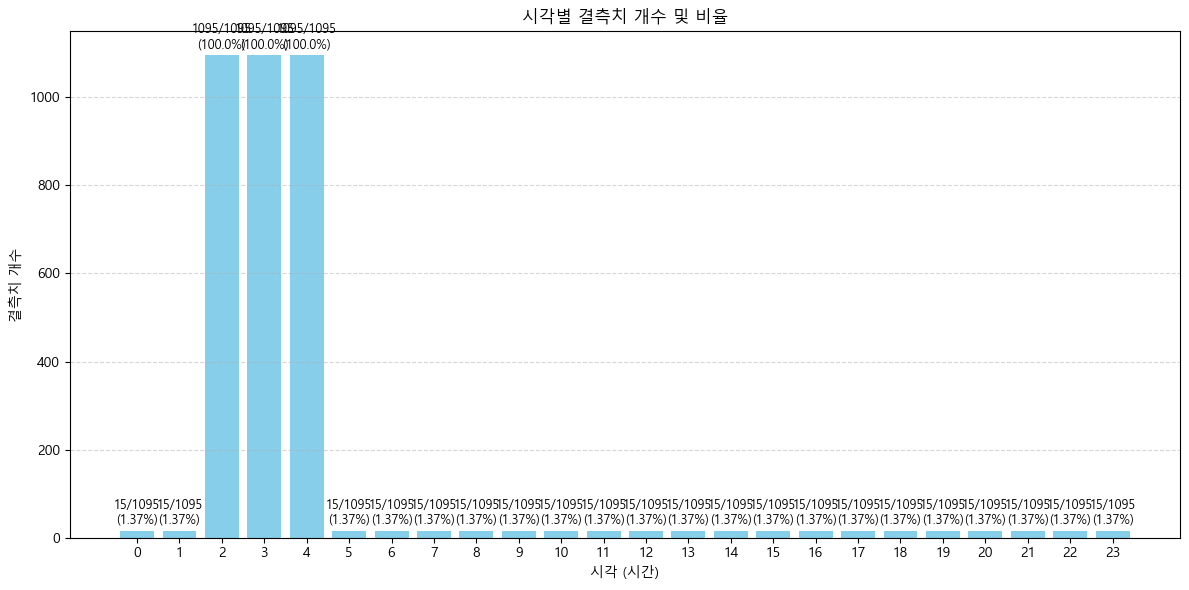

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï (Windows Í∏∞Ï§Ä)
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ÏòàÏãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ (Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Î°ú ÎåÄÏ≤¥)
# df = pd.read_csv('your_file.csv')  # ÏòàÏãúÏûÖÎãàÎã§. Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÌïÑÏöî

# 1. 'ÏãúÍ∞Ñ' Ïª¨Îüº datetime Î≥ÄÌôò (ÏûêÎèô ÌòïÏãù Ïù∏Ïãù)
df['ÏãúÍ∞Ñ'] = pd.to_datetime(df['ÏãúÍ∞Ñ'], errors='coerce')

# 2. Ï†ÑÏ≤¥ ÏãúÍ∞Ñ Î≤îÏúÑ (2021~2023, 1ÏãúÍ∞Ñ Îã®ÏúÑ)
full_time_range = pd.date_range(start='2021-01-01 00:00', end='2023-12-31 23:00', freq='H')

# 3. Ïã§Ï†ú Ï°¥Ïû¨ÌïòÎäî ÏãúÍ∞Ñ Í∞í
actual_times = df['ÏãúÍ∞Ñ'].dropna().drop_duplicates()

# 4. ÎàÑÎùΩÎêú ÏãúÍ∞Ñ Í≥ÑÏÇ∞
missing_times = full_time_range.difference(actual_times)

# 5. ÏãúÍ∞ÅÎ≥Ñ Í∞úÏàò ÏÑ∏Í∏∞
missing_hour_counts = missing_times.to_series().dt.hour.value_counts().sort_index()
valid_hour_counts = actual_times.dt.hour.value_counts().reindex(range(24), fill_value=0)

# 6. ÏãúÍ∞ÅÎ≥Ñ Ï¥ù Î∞úÏÉù Ïàò = Ïú†Ìö® + Í≤∞Ï∏°
total_hour_counts = missing_hour_counts.add(valid_hour_counts, fill_value=0).astype(int)

# 7. Í≤∞Ï∏° ÎπÑÏú® Í≥ÑÏÇ∞
missing_rate = (missing_hour_counts / total_hour_counts * 100).round(2)

# 8. Î∞î Ï∞®Ìä∏ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
bars = plt.bar(missing_hour_counts.index, missing_hour_counts.values, color='skyblue')
plt.xticks(range(24))
plt.xlabel('ÏãúÍ∞Å (ÏãúÍ∞Ñ)')
plt.ylabel('Í≤∞Ï∏°Ïπò Í∞úÏàò')
plt.title('ÏãúÍ∞ÅÎ≥Ñ Í≤∞Ï∏°Ïπò Í∞úÏàò Î∞è ÎπÑÏú®')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 9. ÎßâÎåÄ ÏúÑÏóê Ïà´Ïûê Ï∂úÎ†• (Í≤∞Ï∏° Í∞úÏàò / Ï†ÑÏ≤¥ / ÎπÑÏú®)
for i, bar in enumerate(bars):
    hour = bar.get_x() + bar.get_width() / 2
    missing = int(missing_hour_counts.get(i, 0))
    total = total_hour_counts.get(i, 0)
    percent = missing_rate.get(i, 0)
    label = f'{missing}/{total}\n({percent}%)'
    plt.text(hour, bar.get_height() + 10, label, ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
import holidays

# 2Ïãú, 3Ïãú, 4Ïãú Ï†úÏô∏Ìïú Í≤∞Ï∏° ÏãúÍ∞Ñ ÌïÑÌÑ∞ÎßÅ
filtered_missing_times = missing_times[~missing_times.to_series().dt.hour.isin([2, 3, 4])]

# ÎÇ†ÏßúÎßå Ï∂îÏ∂ú (datetime.date ÏïÑÎãò!)
filtered_missing_dates = pd.to_datetime(filtered_missing_times).normalize()
unique_dates = pd.Series(filtered_missing_dates).drop_duplicates().sort_values().reset_index(drop=True)

# ÏöîÏùº Î¨∏Ïûê Îß§Ìïë
weekday_map = ['Ïõî', 'Ìôî', 'Ïàò', 'Î™©', 'Í∏à', 'ÌÜ†', 'Ïùº']

# Í≥µÌú¥Ïùº Í∞ùÏ≤¥ ÏÉùÏÑ± (Í≤∞Ï∏° ÎÇ†ÏßúÏùò Ïó∞ÎèÑ Í∏∞Ï§Ä)
years = unique_dates.dt.year.unique()
kr_holidays = holidays.KR(years=years)

# ÏöîÏùº Î¨∏Ïûê, Í≥µÌú¥Ïùº Ïó¨Î∂Ä Í≥ÑÏÇ∞
result = pd.DataFrame({
    'ÎÇ†Ïßú': unique_dates,
})
result['ÏöîÏùºÏà´Ïûê'] = result['ÎÇ†Ïßú'].dt.weekday
result['ÏöîÏùºÎ¨∏Ïûê'] = result['ÏöîÏùºÏà´Ïûê'].apply(lambda x: weekday_map[x])
result['Í≥µÌú¥ÏùºÏó¨Î∂Ä'] = result['ÎÇ†Ïßú'].dt.date.apply(lambda x: 1 if x in kr_holidays else 0)

# ÏöîÏùº Ïà´Ïûê Ï†úÍ±∞ÌïòÍ≥† Ï∂úÎ†•
result = result.drop(columns='ÏöîÏùºÏà´Ïûê')
print(result)


           ÎÇ†Ïßú ÏöîÏùºÎ¨∏Ïûê  Í≥µÌú¥ÏùºÏó¨Î∂Ä
0  2022-01-22    ÌÜ†      0
1  2022-03-03    Î™©      0
2  2022-03-05    ÌÜ†      0
3  2022-03-06    Ïùº      0
4  2022-03-07    Ïõî      0
5  2022-03-08    Ìôî      0
6  2022-03-09    Ïàò      1
7  2022-03-10    Î™©      0
8  2022-10-01    ÌÜ†      0
9  2022-10-04    Ìôî      0
10 2022-11-22    Ìôî      0
11 2022-12-17    ÌÜ†      0
12 2022-12-20    Ìôî      0
13 2022-12-21    Ïàò      0
14 2023-03-13    Ïõî      0


In [9]:
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16369324 entries, 0 to 16369323
Data columns (total 18 columns):
 #   Column    Dtype         
---  ------    -----         
 0   ÏãúÍ∞Ñ        datetime64[ns]
 1   Ìò∏ÏÑ†        int64         
 2   Ïó≠Î≤àÌò∏       int64         
 3   Ïó≠Î™Ö        object        
 4   ÏÉÅÌïòÍµ¨Î∂Ñ      object        
 5   AWS_ÏßÄÏ†êÏΩîÎìú  int64         
 6   Í∏∞Ïò®        float64       
 7   ÌíçÌñ•        float64       
 8   ÌíçÏÜç        float64       
 9   ÏùºÍ∞ïÏàòÎüâ      float64       
 10  ÏãúÍ∞ÑÍ∞ïÏàòÎüâ     float64       
 11  ÏÉÅÎåÄÏäµÎèÑ      float64       
 12  ÏùºÏÇ¨Îüâ       float64       
 13  Ï≤¥Í∞êÏò®ÎèÑ      float64       
 14  ÌòºÏû°ÎèÑ       int64         
 15  ÏöîÏùºÏà´Ïûê      int32         
 16  ÏöîÏùºÎ¨∏Ïûê      object        
 17  Í≥µÌú¥ÏùºÏó¨Î∂Ä     int64         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(5), object(3)
memory usage: 2.1+ GB
                   ÏãúÍ∞Ñ  Ìò∏ÏÑ†  Ïó≠Î≤àÌò∏   Ïó≠Î™Ö ÏÉÅÌïòÍµ¨Î∂Ñ  AWS_ÏßÄÏ

In [ ]:
# -99Î•º Í≤∞Ï∏°ÏπòÎ°ú Î∞îÍæ∏Í∏∞
df.replace(-99, np.nan, inplace=True)
missing_counts = df.isnull().sum()
missing_ratio = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Í≤∞Ï∏°Ïπò Ïàò': missing_counts,
    'Í≤∞Ï∏°Î•† (%)': missing_ratio.round(2)
})

print(missing_df[missing_df['Í≤∞Ï∏°Ïπò Ïàò'] > 0])

         Í≤∞Ï∏°Ïπò Ïàò  Í≤∞Ï∏°Î•† (%)
Í∏∞Ïò®      216468     1.32
ÌíçÌñ•      230786     1.41
ÌíçÏÜç      230786     1.41
ÏùºÍ∞ïÏàòÎüâ    351574     2.15
ÏãúÍ∞ÑÍ∞ïÏàòÎüâ   360796     2.20
ÏÉÅÎåÄÏäµÎèÑ    844594     5.16
ÏùºÏÇ¨Îüâ    6064242    37.05
Ï≤¥Í∞êÏò®ÎèÑ       352     0.00


In [11]:
missing_df

Í≤∞Ï∏°Ïπò Ïàò  Í≤∞Ï∏°Î•† (%)
ÏãúÍ∞Ñ              0     0.00
Ìò∏ÏÑ†              0     0.00
Ïó≠Î≤àÌò∏             0     0.00
Ïó≠Î™Ö              0     0.00
ÏÉÅÌïòÍµ¨Î∂Ñ            0     0.00
AWS_ÏßÄÏ†êÏΩîÎìú        0     0.00
Í∏∞Ïò®         216468     1.32
ÌíçÌñ•         230786     1.41
ÌíçÏÜç         230786     1.41
ÏùºÍ∞ïÏàòÎüâ       351574     2.15
ÏãúÍ∞ÑÍ∞ïÏàòÎüâ      360796     2.20
ÏÉÅÎåÄÏäµÎèÑ       844594     5.16
ÏùºÏÇ¨Îüâ       6064242    37.05
Ï≤¥Í∞êÏò®ÎèÑ          352     0.00
ÌòºÏû°ÎèÑ             0     0.00
ÏöîÏùºÏà´Ïûê            0     0.00
ÏöîÏùºÎ¨∏Ïûê            0     0.00
Í≥µÌú¥ÏùºÏó¨Î∂Ä           0     0.00

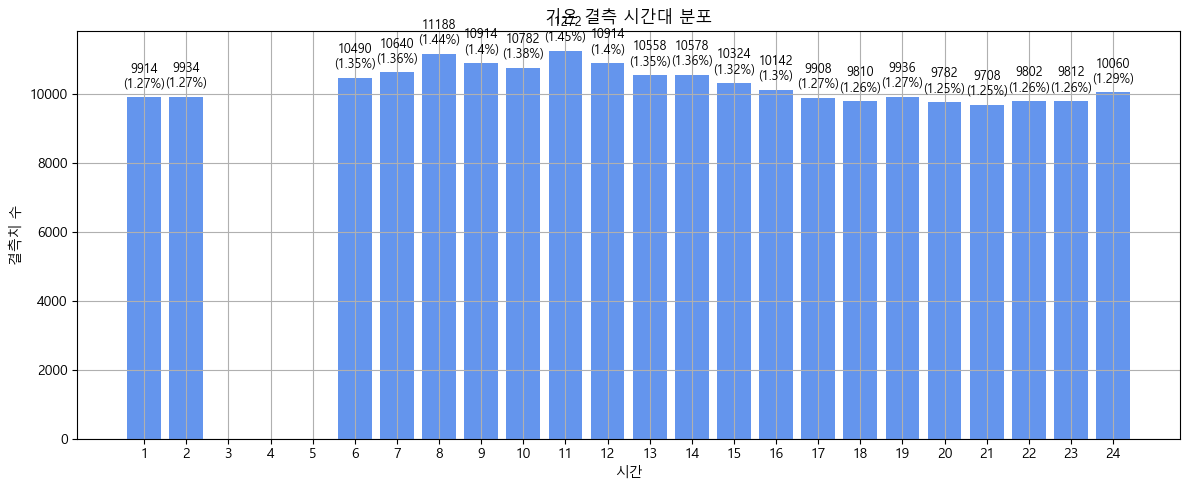

In [ ]:
import matplotlib.pyplot as plt

# ÏãúÍ∞ÑÎåÄÎ≥Ñ Ï†ÑÏ≤¥ ÏàòÏôÄ Í≤∞Ï∏°Ïπò Ïàò
hourly_total = df['ÏãúÍ∞Ñ'].dt.hour.value_counts().sort_index()
hourly_missing = df[df['Í∏∞Ïò®'].isnull()]['ÏãúÍ∞Ñ'].dt.hour.value_counts().sort_index()

# ÎπÑÏú® Í≥ÑÏÇ∞ (%)
hourly_missing_rate = (hourly_missing / hourly_total * 100).round(2)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 5))
bars = plt.bar(hourly_missing.index, hourly_missing, color='cornflowerblue')

# ÌÉÄÏù¥ÌãÄ Î∞è Î†àÏù¥Î∏î
plt.title('Í∏∞Ïò® Í≤∞Ï∏° ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨')
plt.xlabel('ÏãúÍ∞Ñ')
plt.ylabel('Í≤∞Ï∏°Ïπò Ïàò')

# xÏ∂ïÏùÑ 0~23ÍπåÏßÄ Í≥†Ï†ïÌïòÏó¨ ÌëúÏãú
plt.xticks(ticks=range(24), labels=[str(i+1) for i in range(24)], rotation=0)

plt.grid(True)

# ÎßâÎåÄ ÏúÑÏóê Í∞í ÌëúÏãú (Í∞úÏàò Î∞è ÎπÑÏú®)
for bar in bars:
    hour = int(bar.get_x() + bar.get_width() / 2)
    count = int(hourly_missing.get(hour, 0))  # Í∞íÏù¥ ÏóÜÏùÑ ÏàòÎèÑ ÏûàÏúºÎØÄÎ°ú get ÏÇ¨Ïö©
    rate = hourly_missing_rate.get(hour, 0.0)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 200,
             f'{count}\n({rate}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [24]:
# üìå Í∏∞ÏÉÅ Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏°Ïπò ÌòÑÌô©ÏùÑ ÏãúÍ∞Ñ(hour), Ïõî(month), Ïó∞ÎèÑ(year) Îã®ÏúÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®ÏàòÎì§
import pandas as pd
import matplotlib.pyplot as plt

# ÏãúÍ∞Ñ Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò
df['ÏãúÍ∞Ñ'] = pd.to_datetime(df['ÏãúÍ∞Ñ'])

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïó¥
target_columns = ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ', 'Ï≤¥Í∞êÏò®ÎèÑ']

# üïí ÏãúÍ∞Ñ Îã®ÏúÑ Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_missing_by_hour(df, column):
    df_time = df.copy()
    df_time['hour'] = df_time['ÏãúÍ∞Ñ'].dt.hour
    
    total = df_time['hour'].value_counts().sort_index()
    missing = df_time[df_time[column].isnull()]['hour'].value_counts().sort_index()
    rate = (missing / total * 100).round(2)
    
    plt.figure(figsize=(12, 5))
    bars = plt.bar(missing.index, missing.values, color='skyblue')
    plt.title(f'{column} Í≤∞Ï∏°Ïπò - ÏãúÍ∞Ñ(Hour) Îã®ÏúÑ Î∂ÑÌè¨')
    plt.xlabel('Hour')
    plt.ylabel('Í≤∞Ï∏°Ïπò Ïàò')
    plt.xticks(ticks=range(24), labels=[str(i+1) for i in range(24)], rotation=0)
    
    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# üìÖ Ïõî Îã®ÏúÑ Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_missing_by_month(df, column):
    df_time = df.copy()
    df_time['month'] = df_time['ÏãúÍ∞Ñ'].dt.month
    
    total = df_time['month'].value_counts().sort_index()
    missing = df_time[df_time[column].isnull()]['month'].value_counts().sort_index()
    rate = (missing / total * 100).round(2)
    
    plt.figure(figsize=(12, 5))
    bars = plt.bar(missing.index, missing.values, color='salmon')
    plt.title(f'{column} Í≤∞Ï∏°Ïπò - Ïõî(Month) Îã®ÏúÑ Î∂ÑÌè¨')
    plt.xlabel('Month')
    plt.ylabel('Í≤∞Ï∏°Ïπò Ïàò')
    plt.xticks(ticks=range(1, 13), labels=[f'{i}Ïõî' for i in range(1, 13)])
    
    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# üìÜ Ïó∞ÎèÑ Îã®ÏúÑ Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_missing_by_year(df, column):
    df_time = df.copy()
    df_time['year'] = df_time['ÏãúÍ∞Ñ'].dt.year
    
    total = df_time['year'].value_counts().sort_index()
    missing = df_time[df_time[column].isnull()]['year'].value_counts().sort_index()
    rate = (missing / total * 100).round(2)
    
    plt.figure(figsize=(12, 5))
    bars = plt.bar(missing.index, missing.values, color='mediumseagreen')
    plt.title(f'{column} Í≤∞Ï∏°Ïπò - Ïó∞ÎèÑ(Year) Îã®ÏúÑ Î∂ÑÌè¨')
    plt.xlabel('Year')
    plt.ylabel('Í≤∞Ï∏°Ïπò Ïàò')
    plt.xticks(rotation=45)
    
    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 10, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
def plot_missing_block_distribution(df, column):
    print(f'\nüìâ [{column}] Ïó∞ÏÜç Í≤∞Ï∏° Î∏îÎ°ù Î∂ÑÌè¨ Î∂ÑÏÑù')

    df_sorted = df.sort_values('ÏãúÍ∞Ñ').reset_index(drop=True)
    is_null = df_sorted[column].isnull()
    group = (is_null != is_null.shift()).cumsum()

    # Ïó∞ÏÜç Í≤∞Ï∏° Î∏îÎ°ù Ï∂îÏ∂ú
    null_blocks = df_sorted[is_null].groupby(group)
    null_lengths = null_blocks.size().reset_index(name='length')
    length_counts = null_lengths['length'].value_counts().sort_index()

    print(length_counts.head(10))  # ÏÉÅÏúÑ 10Í∞ú Ï∂úÎ†•

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 5))
    length_counts.plot(kind='bar', color='gray')
    plt.title(f'{column} Í≤∞Ï∏° Î∏îÎ°ù Í∏∏Ïù¥ Î∂ÑÌè¨')
    plt.xlabel('Ïó∞ÏÜç Í≤∞Ï∏° Í∏∏Ïù¥ (Í∞ú)')
    plt.ylabel('Î∏îÎ°ù Ïàò')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
# Ìï®Ïàò Ïã§Ìñâ ÏΩîÎìú 
for col in target_columns:
    print(f'\nüìä [{col}] Í≤∞Ï∏°Ïπò Î∂ÑÏÑù')

    # üïí ÏãúÍ∞Ñ Îã®ÏúÑ
    print(f'\nüïí {col} Í≤∞Ï∏°Ïπò - ÏãúÍ∞Ñ(hour) Îã®ÏúÑ')
    plot_missing_by_hour(df, col)

    # üìÖ Ïõî Îã®ÏúÑ
    print(f'\nüìÖ {col} Í≤∞Ï∏°Ïπò - Ïõî(month) Îã®ÏúÑ')
    plot_missing_by_month(df, col)

    # üìÜ Ïó∞ÎèÑ Îã®ÏúÑ
    print(f'\nüìÜ {col} Í≤∞Ï∏°Ïπò - Ïó∞ÎèÑ(year) Îã®ÏúÑ')
    plot_missing_by_year(df, col)

    # üìâ Ïó∞ÏÜç Í≤∞Ï∏° Î∏îÎ°ù Î∂ÑÌè¨
    plot_missing_block_distribution(df, col)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ÏãúÍ∞Ñ ÌååÏÉù Ïª¨Îüº ÏÉùÏÑ± (ÏÇ¨Ïö©ÏûêÏùò Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ Ïù¥ Ïª¨ÎüºÎì§Ïù¥ ÏûàÎã§Î©¥ ÏÉùÎûµÌï¥ÎèÑ Îê©ÎãàÎã§)
df['month'] = df['ÏãúÍ∞Ñ'].dt.month
df['day'] = df['ÏãúÍ∞Ñ'].dt.day
df['hour'] = df['ÏãúÍ∞Ñ'].dt.hour

# ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò
def plot_hourly_missing_by_day_per_month(df, column):
    for month in range(1, 13):
        monthly_data = df[df['month'] == month]
        days_in_month = sorted(monthly_data['day'].unique())
        num_days = len(days_in_month)
        ncols = 7
        nrows = int(np.ceil(num_days / ncols))

        fig, axes = plt.subplots(nrows, ncols, figsize=(22, nrows * 3), sharey=True)
        fig.suptitle(f'{month}Ïõî ÏùºÎ≥Ñ ÏãúÍ∞ÑÎåÄÎ≥Ñ {column} Í≤∞Ï∏°Ïπò Ïàò', fontsize=18)
        axes = axes.flatten()

        for i, day in enumerate(days_in_month):
            daily_data = monthly_data[monthly_data['day'] == day]
            missing_by_hour = daily_data.groupby('hour')[column].apply(lambda x: x.isnull().sum())

            ax = axes[i]
            bars = ax.bar(missing_by_hour.index.astype(str), missing_by_hour.values, color='#FF7043')
            ax.set_title(f'{day}Ïùº')
            ax.set_xticks(range(0, 24))
            ax.set_xticklabels(range(0, 24), rotation=45)
            ax.set_xlabel('ÏãúÍ∞Ñ')
            if i % ncols == 0:
                ax.set_ylabel('Í≤∞Ï∏°Ïπò Ïàò')

            for bar in bars:
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}',
                            ha='center', va='bottom', fontsize=7)

        for j in range(i+1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Í≤∞Ï∏°Ïπò ÏãúÍ∞ÅÌôîÌï† Ïó¥ Î™©Î°ù
columns_to_plot = ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ', 'Ï≤¥Í∞êÏò®ÎèÑ']

# Î™®Îì† Ïó¥Ïóê ÎåÄÌï¥ ÏãúÍ∞ÅÌôî Î∞òÎ≥µ Ïã§Ìñâ
for col in columns_to_plot:
    plot_hourly_missing_by_day_per_month(df, col)


In [ ]:
import pandas as pd

# Î∂ÑÏÑù ÎåÄÏÉÅ Ïó¥
columns = ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ', 'Ï≤¥Í∞êÏò®ÎèÑ']

# Ïù¥ÏÉÅÏπò ÌåêÎ≥Ñ Í≤∞Í≥º Ï†ÄÏû•Ïö©
outlier_summary = []

for col in columns:
    # Í≤∞Ï∏°Ïπò Ï†úÏô∏Ìïú Í∞íÏúºÎ°ú Î∂ÑÏÑù
    series = df[col].dropna()

    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_count = len(outliers)
    total_count = len(series)
    outlier_ratio = round(outlier_count / total_count * 100, 2)

    outlier_summary.append({
        'Ïó¥': col,
        'Ï†ÑÏ≤¥ Í∞úÏàò': total_count,
        'Ïù¥ÏÉÅÏπò Í∞úÏàò': outlier_count,
        'Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)': outlier_ratio
    })

# Í≤∞Í≥º Ï∂úÎ†•
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)


       Ïó¥     Ï†ÑÏ≤¥ Í∞úÏàò   Ïù¥ÏÉÅÏπò Í∞úÏàò  Ïù¥ÏÉÅÏπò ÎπÑÏú®(%)
0     Í∏∞Ïò®  16152856      204       0.00
1     ÌíçÌñ•  16138538        0       0.00
2     ÌíçÏÜç  16138538   483864       3.00
3   ÏùºÍ∞ïÏàòÎüâ  16017750  2889949      18.04
4  ÏãúÍ∞ÑÍ∞ïÏàòÎüâ  16008528   932780       5.83
5   ÏÉÅÎåÄÏäµÎèÑ  15524730        0       0.00
6    ÏùºÏÇ¨Îüâ  10305082        0       0.00
7   Ï≤¥Í∞êÏò®ÎèÑ  16368972      724       0.00


In [29]:
# ‚úÖ ÏãúÍ∞Ñ(hour) Îã®ÏúÑ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_outliers_by_hour(df, column):
    df_time = df.copy()
    df_time['hour'] = df_time['ÏãúÍ∞Ñ'].dt.hour

    # IQR Í∏∞Î∞ò Ïù¥ÏÉÅÏπò ÌåêÎã®
    q1 = df_time[column].quantile(0.25)
    q3 = df_time[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    is_outlier = (df_time[column] < lower) | (df_time[column] > upper)

    total = df_time['hour'].value_counts().sort_index()
    outliers = df_time[is_outlier]['hour'].value_counts().sort_index()
    rate = (outliers / total * 100).round(2)

    plt.figure(figsize=(12, 5))
    bars = plt.bar(outliers.index, outliers.values, color='orange')
    plt.title(f'{column} Ïù¥ÏÉÅÏπò - ÏãúÍ∞Ñ(Hour) Îã®ÏúÑ Î∂ÑÌè¨')
    plt.xlabel('Hour')
    plt.ylabel('Ïù¥ÏÉÅÏπò Ïàò')
    plt.xticks(ticks=range(24), labels=[str(i+1) for i in range(24)])

    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [30]:
# ‚úÖ Ïõî(month) Îã®ÏúÑ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_outliers_by_month(df, column):
    df_time = df.copy()
    df_time['month'] = df_time['ÏãúÍ∞Ñ'].dt.month

    q1 = df_time[column].quantile(0.25)
    q3 = df_time[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    is_outlier = (df_time[column] < lower) | (df_time[column] > upper)

    total = df_time['month'].value_counts().sort_index()
    outliers = df_time[is_outlier]['month'].value_counts().sort_index()
    rate = (outliers / total * 100).round(2)

    plt.figure(figsize=(12, 5))
    bars = plt.bar(outliers.index, outliers.values, color='tomato')
    plt.title(f'{column} Ïù¥ÏÉÅÏπò - Ïõî(Month) Îã®ÏúÑ Î∂ÑÌè¨')
    plt.xlabel('Month')
    plt.ylabel('Ïù¥ÏÉÅÏπò Ïàò')
    plt.xticks(ticks=range(1, 13), labels=[f'{i}Ïõî' for i in range(1, 13)])

    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [31]:
#‚úÖ Ïó∞ÎèÑ(year) Îã®ÏúÑ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_outliers_by_year(df, column):
    df_time = df.copy()
    df_time['year'] = df_time['ÏãúÍ∞Ñ'].dt.year

    q1 = df_time[column].quantile(0.25)
    q3 = df_time[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    is_outlier = (df_time[column] < lower) | (df_time[column] > upper)

    total = df_time['year'].value_counts().sort_index()
    outliers = df_time[is_outlier]['year'].value_counts().sort_index()
    rate = (outliers / total * 100).round(2)

    plt.figure(figsize=(12, 5))
    bars = plt.bar(outliers.index, outliers.values, color='forestgreen')
    plt.title(f'{column} Ïù¥ÏÉÅÏπò - Ïó∞ÎèÑ(Year) Îã®ÏúÑ Î∂ÑÌè¨')
    plt.xlabel('Year')
    plt.ylabel('Ïù¥ÏÉÅÏπò Ïàò')
    plt.xticks(rotation=45)

    for bar in bars:
        if bar.get_height() > 0:
            h = int(bar.get_height())
            r = rate.get(bar.get_x(), 0.0)
            plt.text(bar.get_x() + bar.get_width()/2, h + 5, f'{h}\n({r}%)',
                     ha='center', va='bottom', fontsize=8)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()



===== üîç Í∏∞Ïò® Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


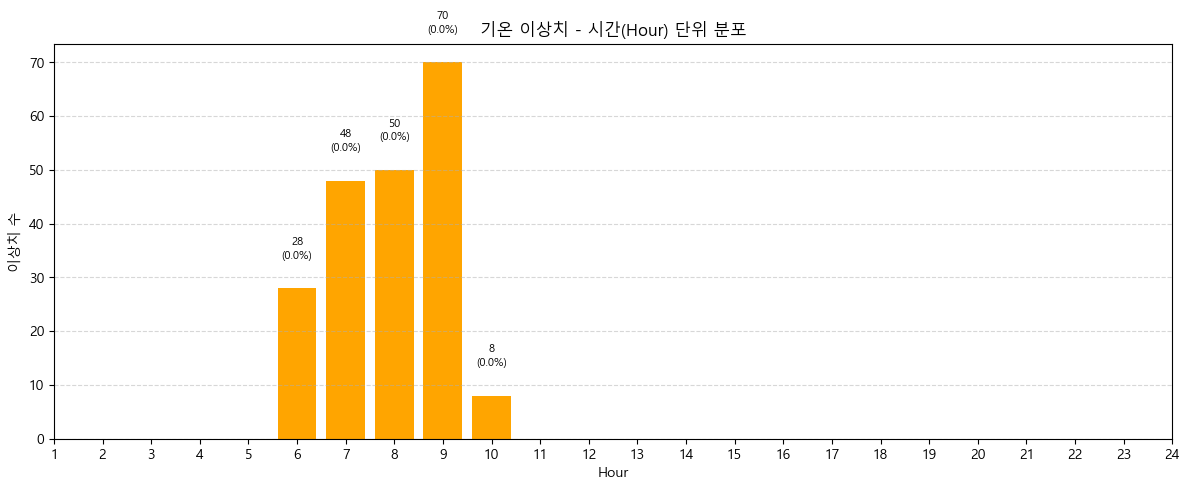

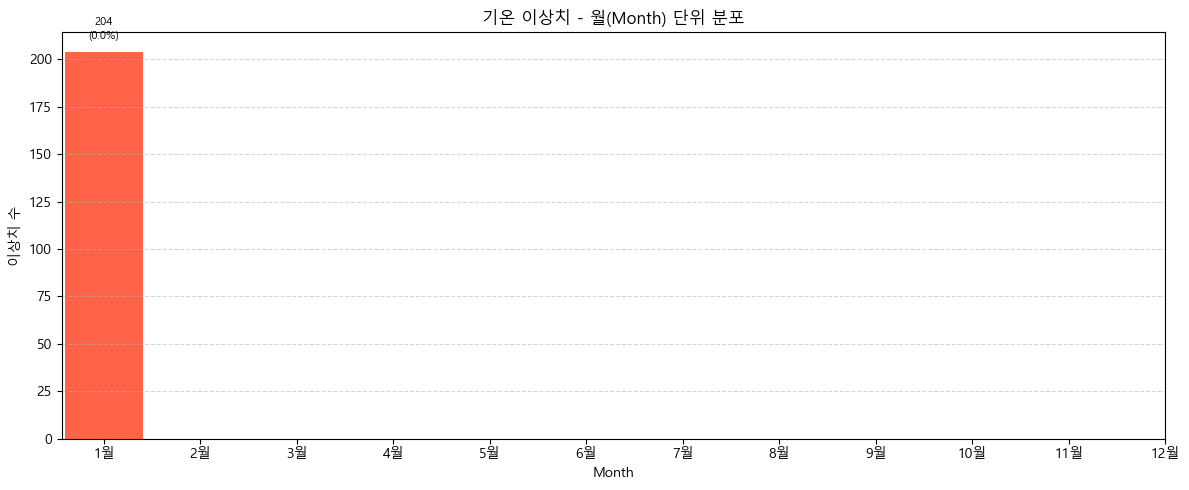

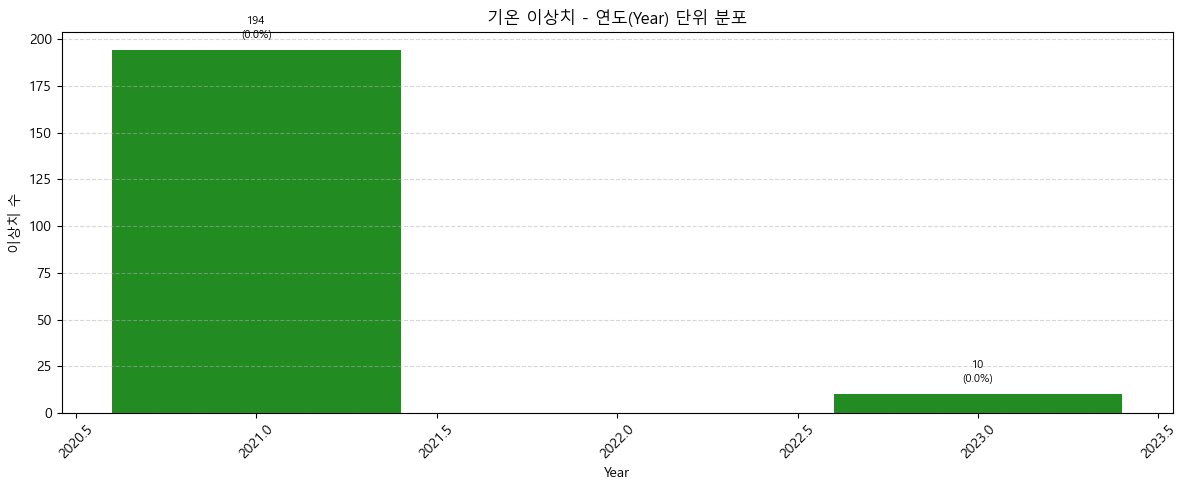


===== üîç ÌíçÌñ• Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


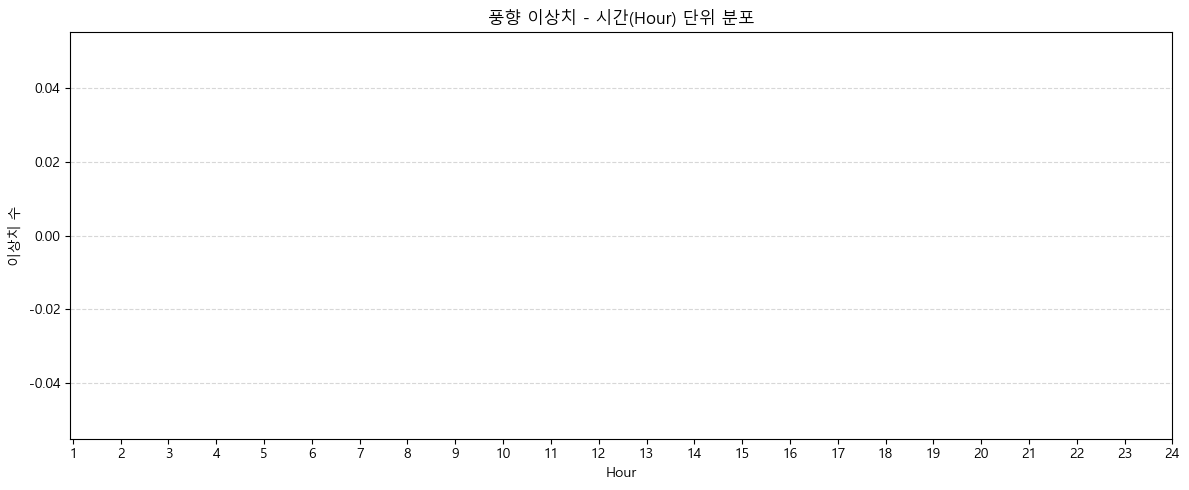

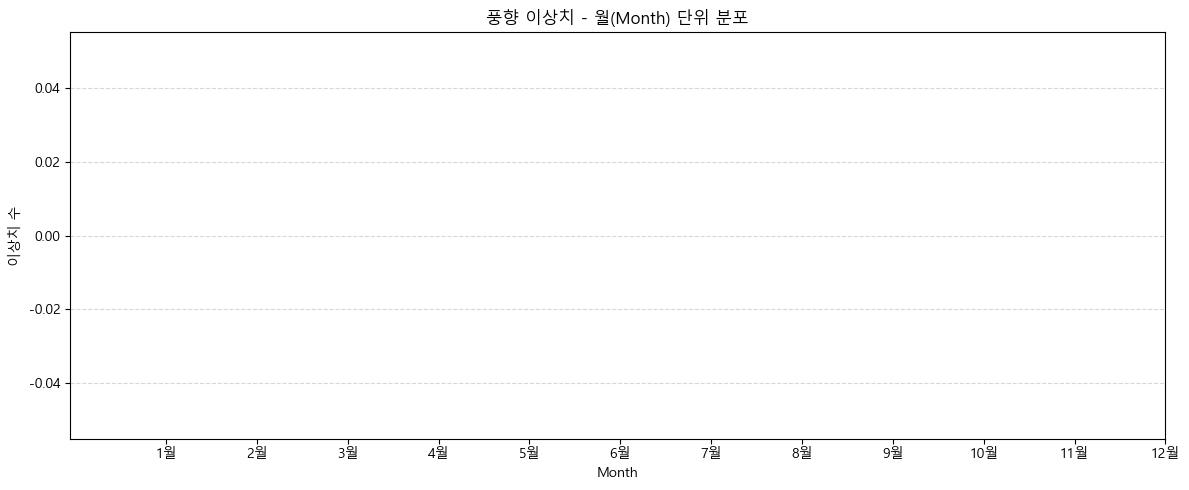

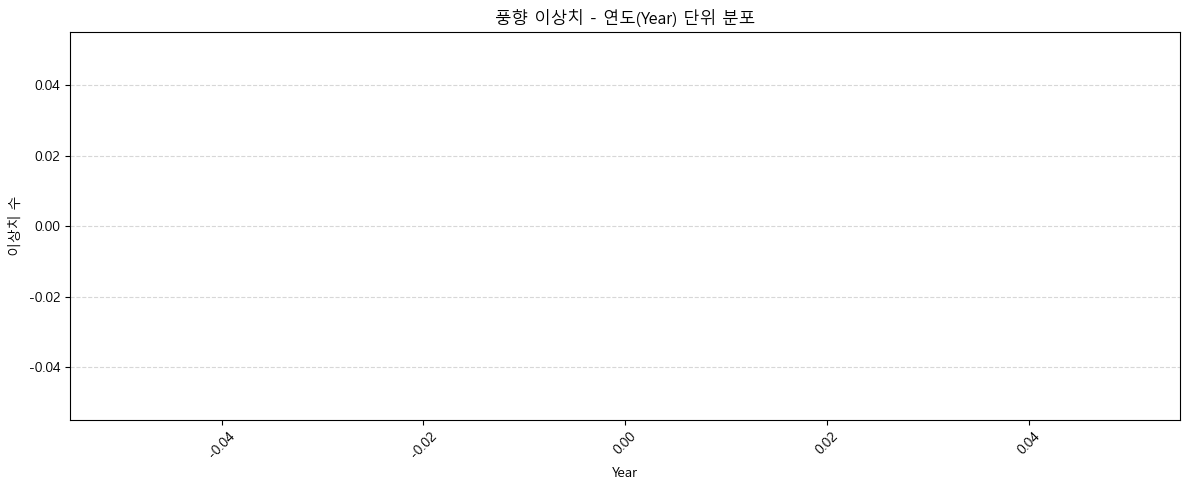


===== üîç ÌíçÏÜç Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


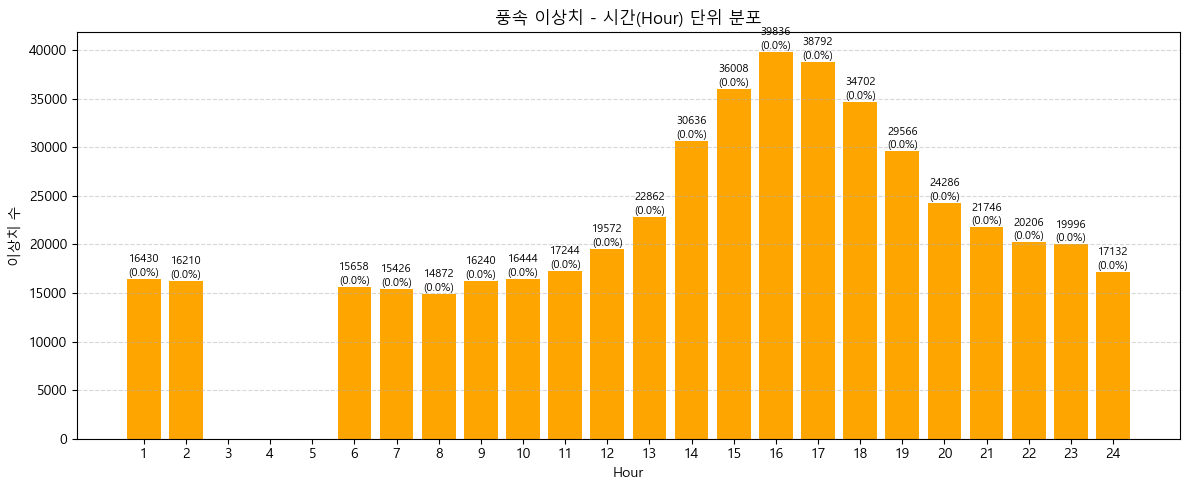

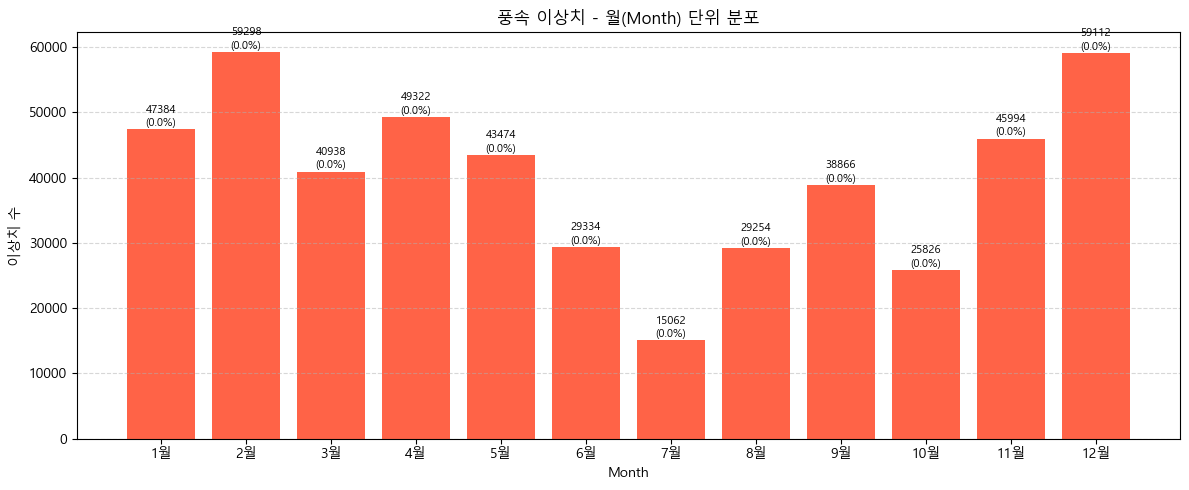

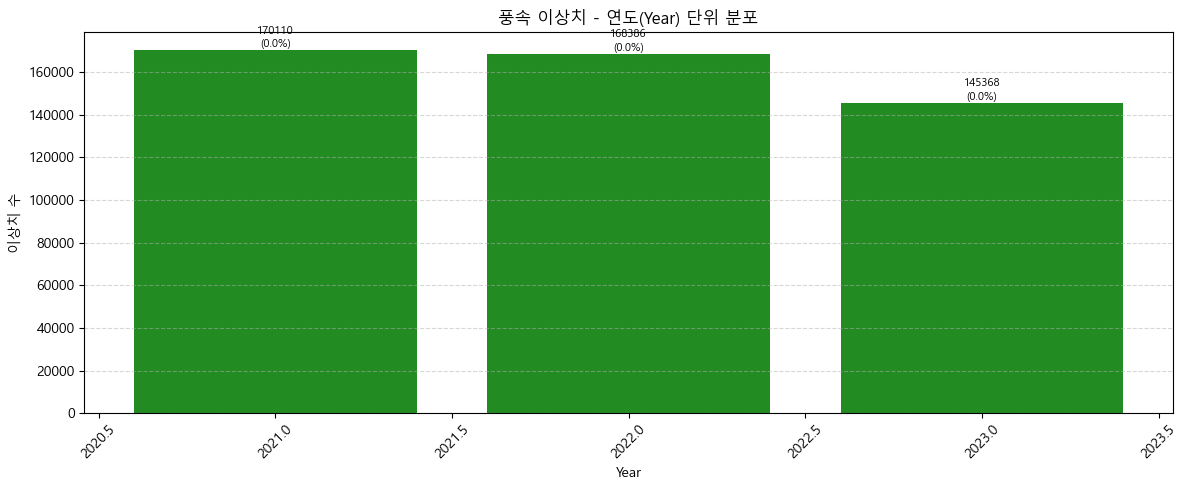


===== üîç ÏùºÍ∞ïÏàòÎüâ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


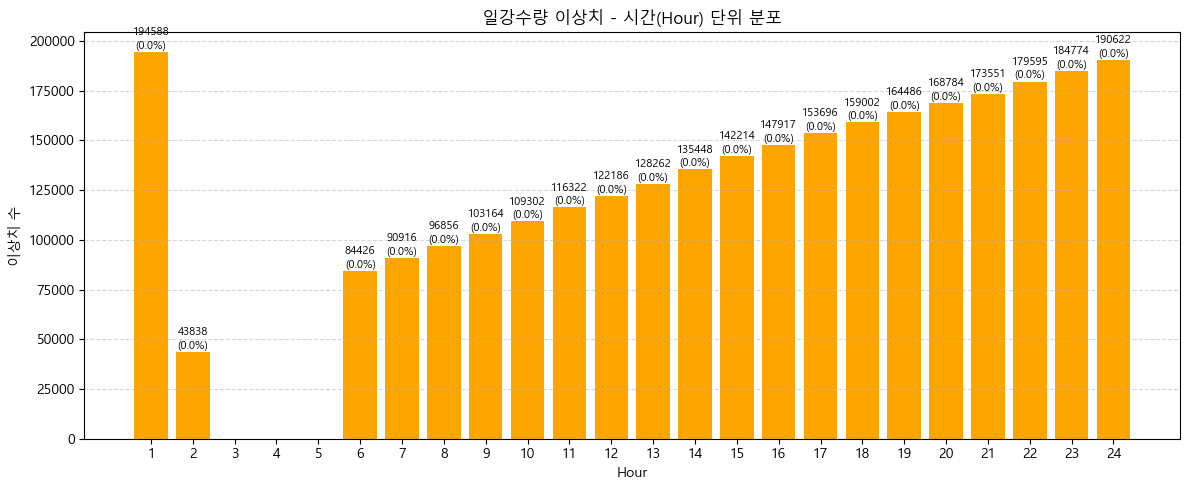

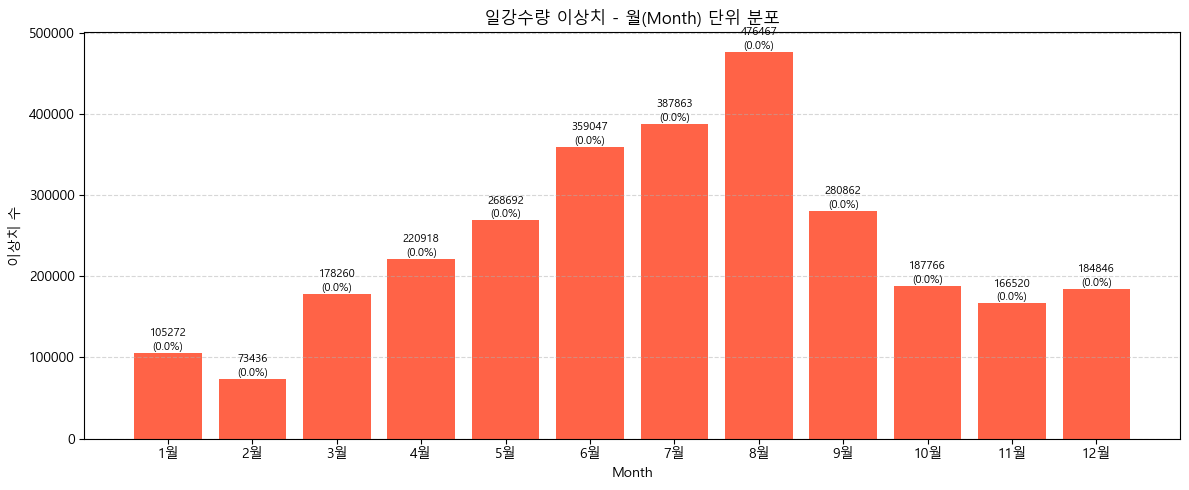

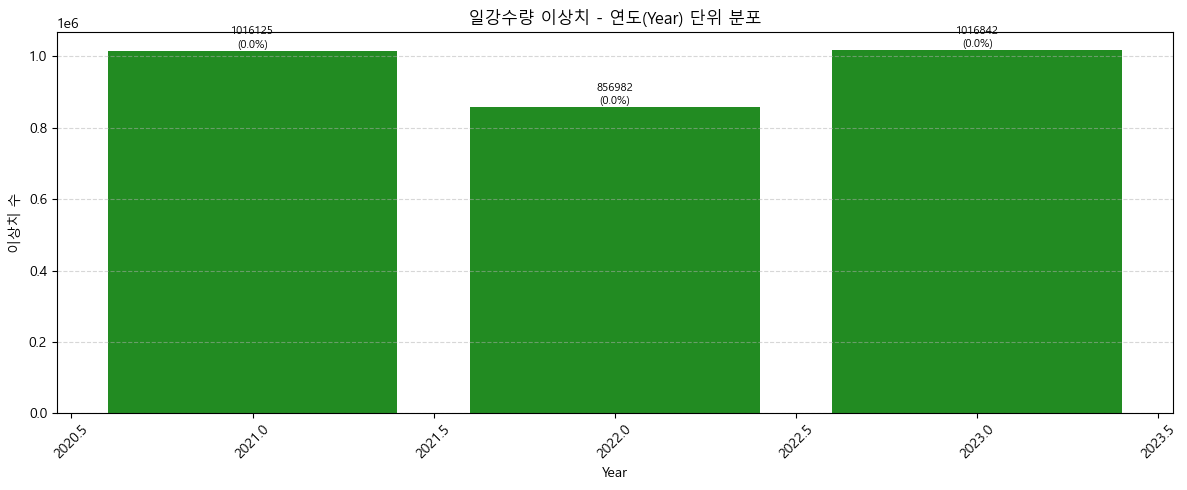


===== üîç ÏãúÍ∞ÑÍ∞ïÏàòÎüâ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


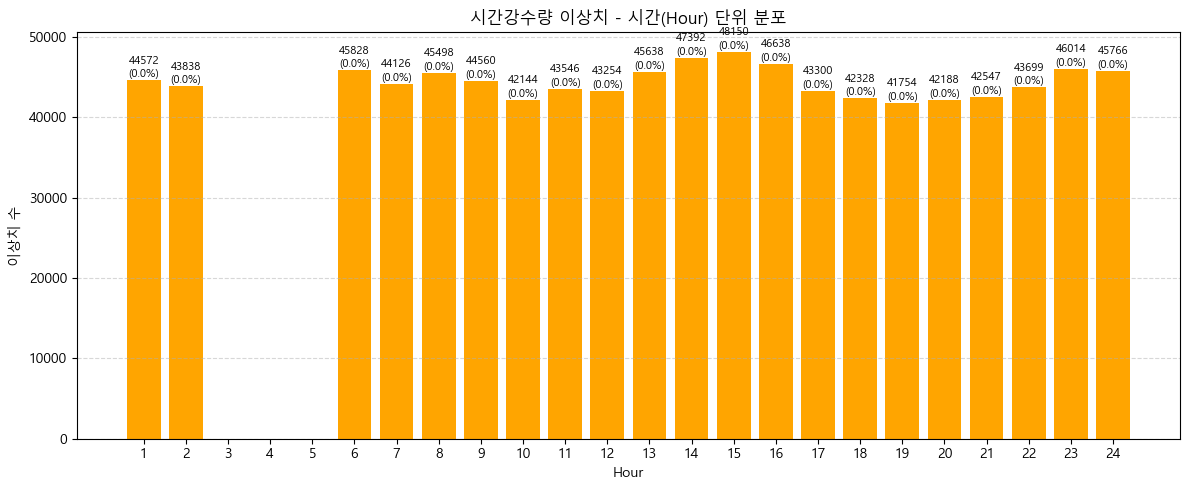

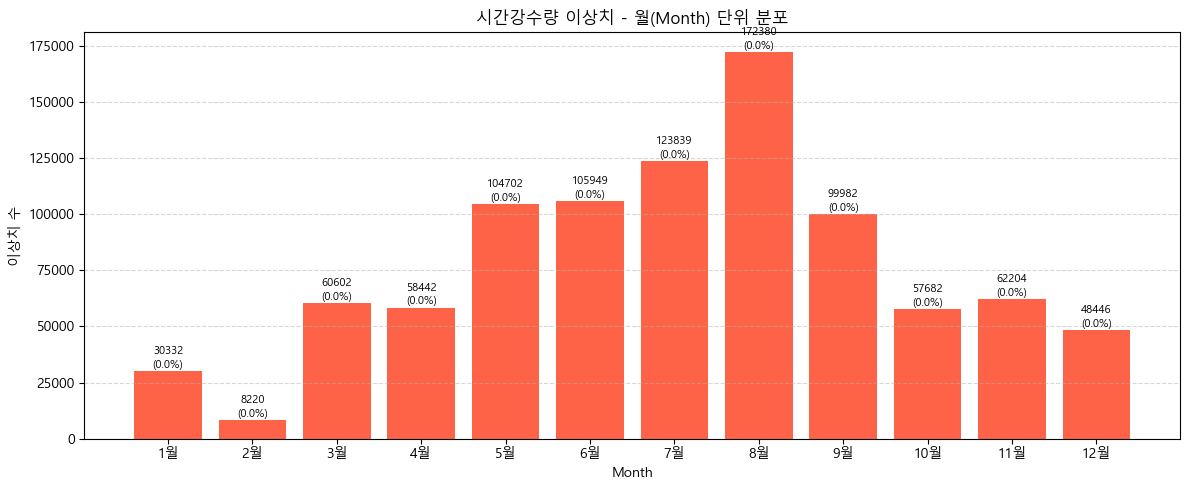

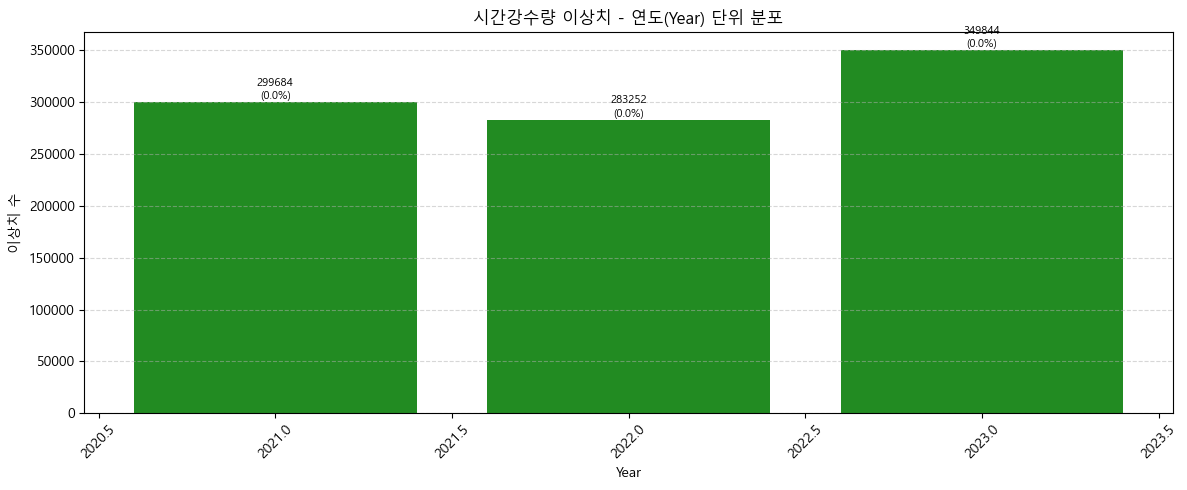


===== üîç ÏÉÅÎåÄÏäµÎèÑ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


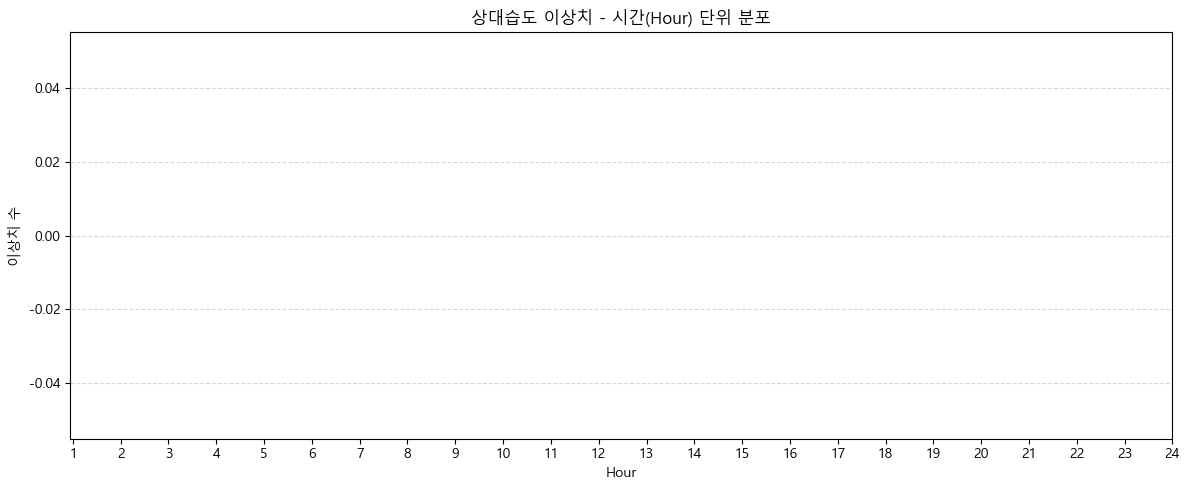

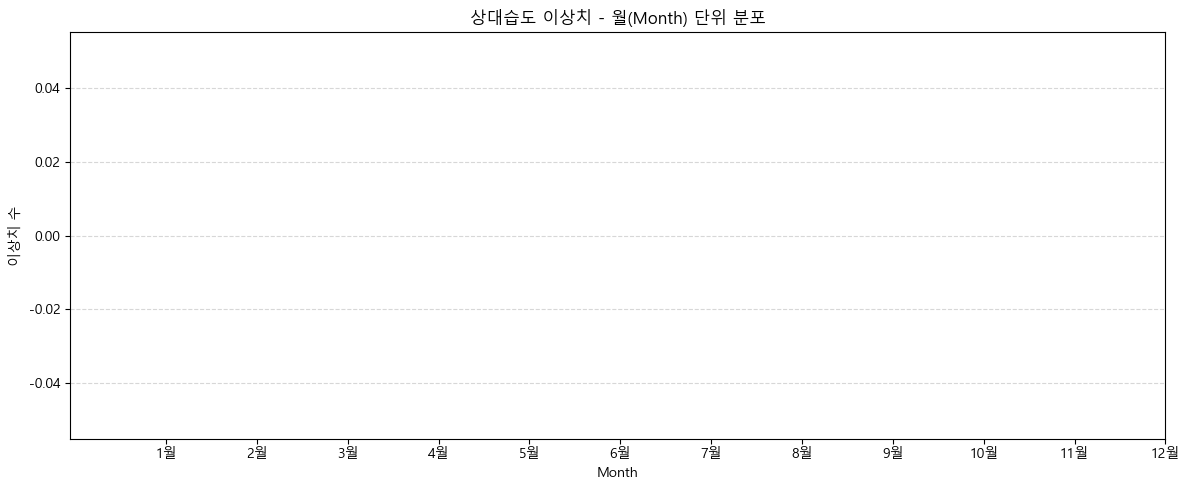

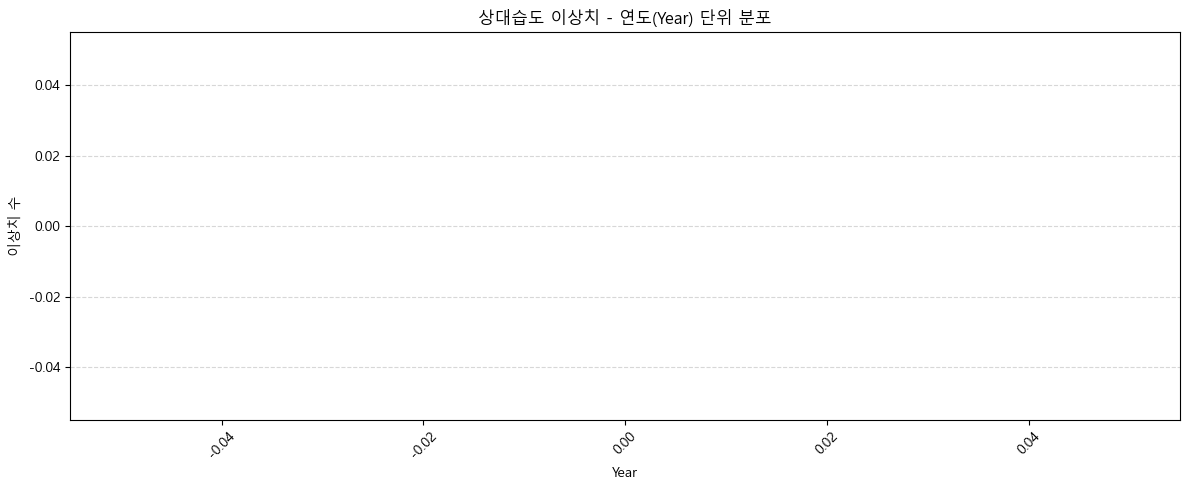


===== üîç ÏùºÏÇ¨Îüâ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


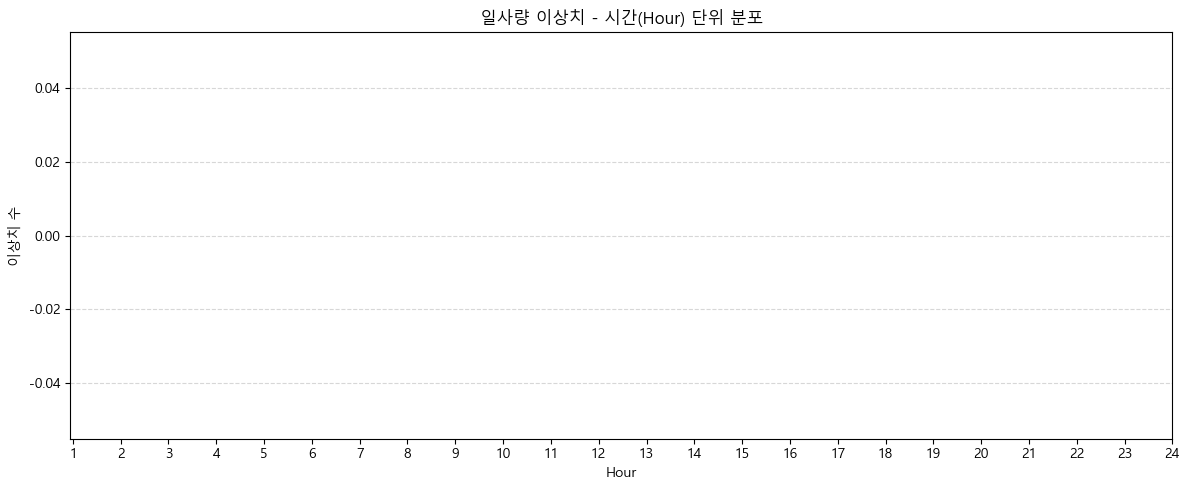

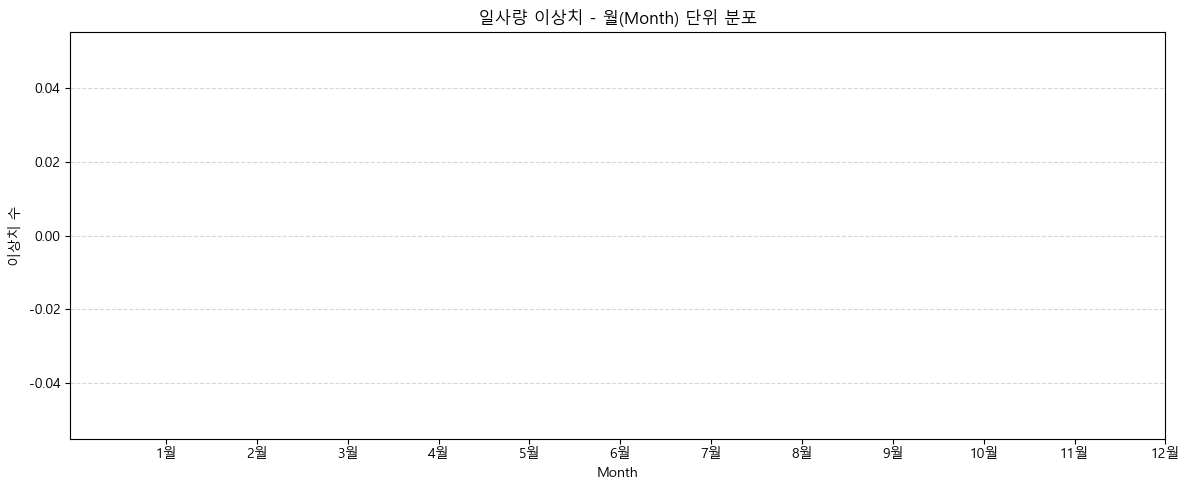

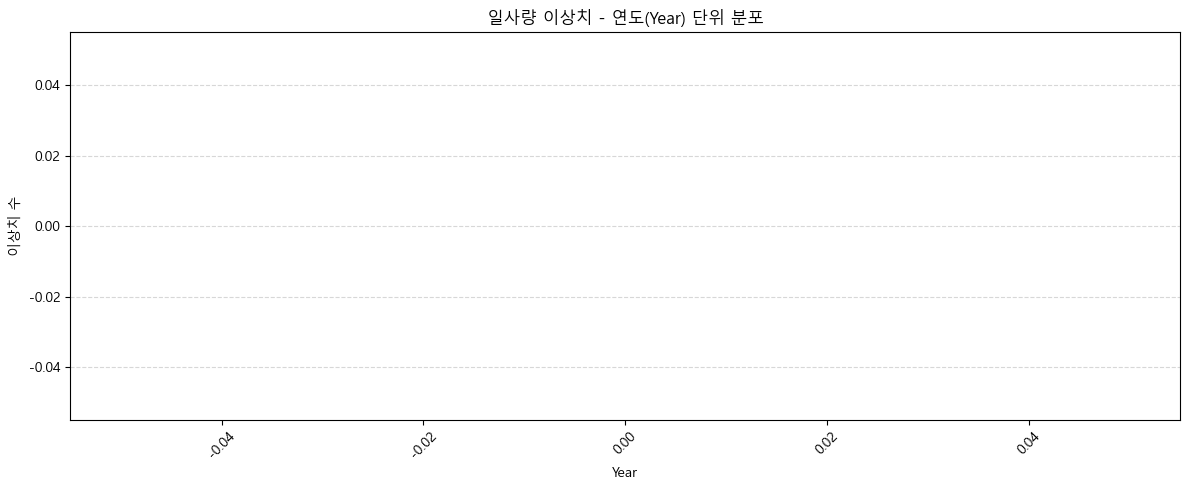


===== üîç Ï≤¥Í∞êÏò®ÎèÑ Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====


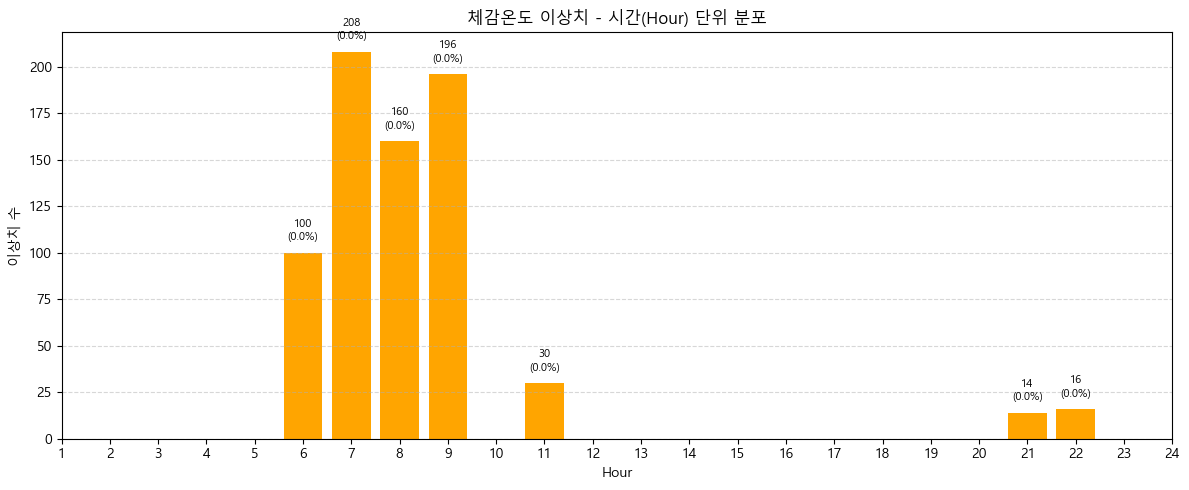

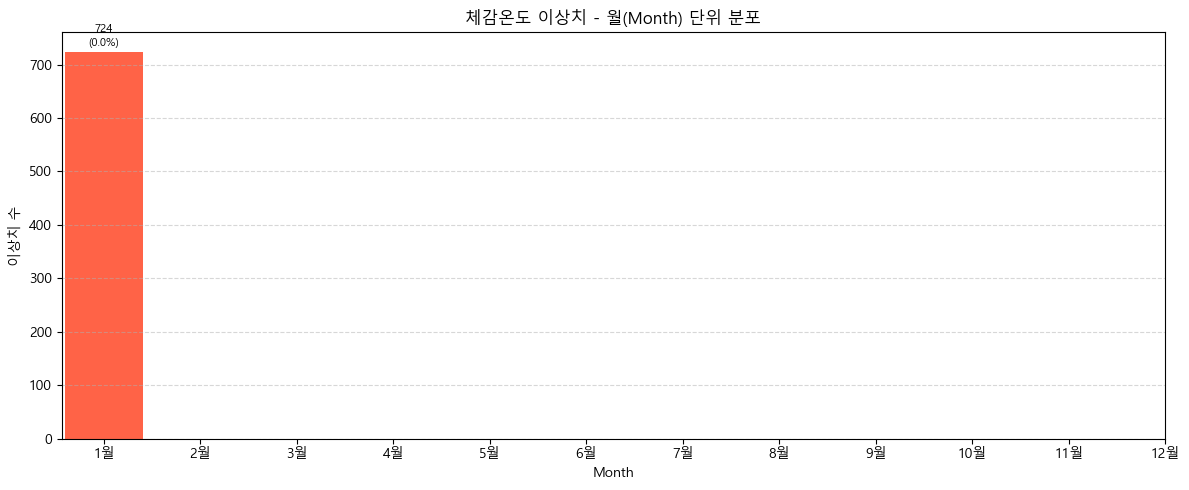

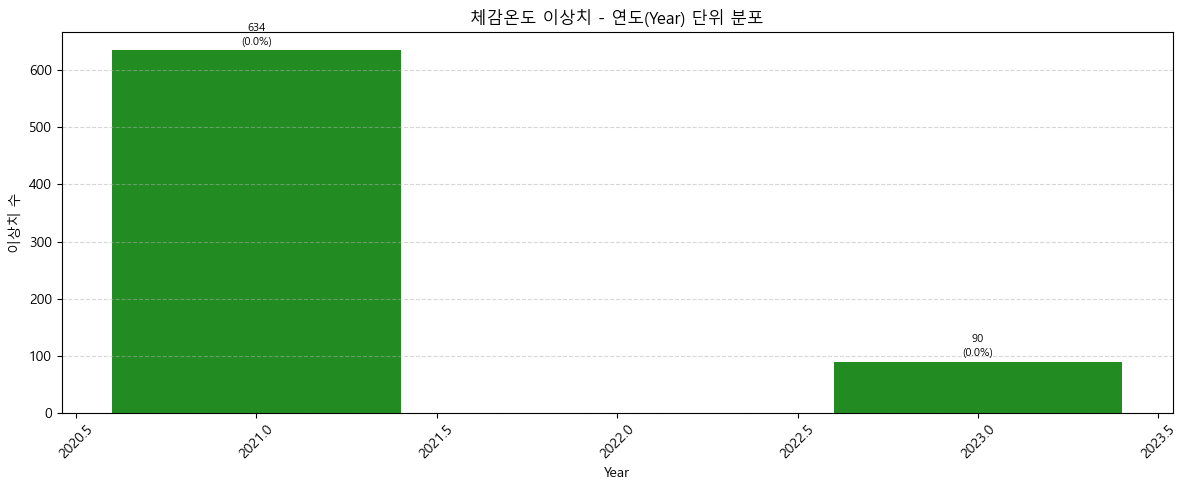

In [32]:
# Î∂ÑÏÑù ÎåÄÏÉÅ Ïó¥
target_columns = ['Í∏∞Ïò®', 'ÌíçÌñ•', 'ÌíçÏÜç', 'ÏùºÍ∞ïÏàòÎüâ', 'ÏãúÍ∞ÑÍ∞ïÏàòÎüâ', 'ÏÉÅÎåÄÏäµÎèÑ', 'ÏùºÏÇ¨Îüâ', 'Ï≤¥Í∞êÏò®ÎèÑ']

# Ï†ÑÏ≤¥ Ïó¥ Î∞òÎ≥µ Ïã§Ìñâ
for col in target_columns:
    print(f'\n===== üîç {col} Ïù¥ÏÉÅÏπò ÏãúÍ∞ÅÌôî =====')
    plot_outliers_by_hour(df, col)
    plot_outliers_by_month(df, col)
    plot_outliers_by_year(df, col)


Ïù¥ÏÉÅÏπò Í∞í:
291422     -21.2
299087     -21.2
306752     -21.2
314417     -21.2
322082     -21.2
            ... 
11697335   -21.0
14611712   -21.0
14619356   -21.0
14627000   -21.0
14634644   -21.0
Name: Í∏∞Ïò®, Length: 204, dtype: float64


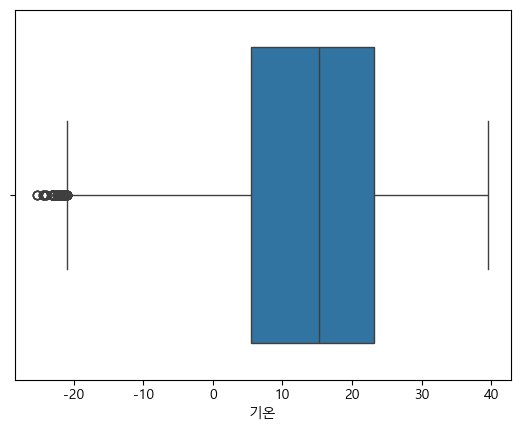

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Í∏∞Ïò® Ïó¥ÏóêÏÑú Ïù¥ÏÉÅÏπò Íµ¨ÌïòÍ∏∞
q1 = df['Í∏∞Ïò®'].quantile(0.25)
q3 = df['Í∏∞Ïò®'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Ïù¥ÏÉÅÏπò Îç∞Ïù¥ÌÑ∞Îßå Ï∂îÏ∂ú
outliers = df[(df['Í∏∞Ïò®'] < lower_bound) | (df['Í∏∞Ïò®'] > upper_bound)]

# Ïù¥ÏÉÅÏπò Í∞íÎßå Ï†ÄÏû• (Series ÌòïÌÉú)
outlier_values = outliers['Í∏∞Ïò®']

# Ï∂úÎ†•
print("Ïù¥ÏÉÅÏπò Í∞í:")
print(outlier_values)

sns.boxplot(x=df['Í∏∞Ïò®'])
plt.show()